In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/Kmean_dataset.csv")
df

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
mean_normalized_data = (df - df.mean()) / (df.max() - df.min())
mean_normalized_data

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12
0,0.323522,-0.123784,0.033948,-0.200770,0.296287,0.174099,0.217454,-0.154441,0.220537,0.049651,0.067114,0.479236,0.226895
1,0.052469,-0.109950,-0.121132,-0.427574,0.002809,0.122375,0.154163,-0.192177,-0.098075,-0.057857,0.075244,0.288760,0.216196
2,0.041943,0.004674,0.162290,-0.046131,0.013679,0.174099,0.255428,-0.116706,0.384574,0.053064,0.058984,0.204511,0.312487
3,0.360364,-0.076353,0.071381,-0.138915,0.144113,0.536168,0.308171,-0.229913,0.185836,0.233951,-0.079227,0.307075,0.522901
4,0.062995,0.050129,0.269242,0.077580,0.198461,0.174099,0.139395,0.053106,0.072272,-0.062977,0.067114,0.116599,-0.008483
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.186679,0.654872,0.044643,0.051807,-0.051539,-0.212108,-0.299424,0.298389,-0.167476,0.225419,-0.258089,-0.319299,-0.004917
174,0.105101,0.310998,0.060686,0.180673,0.024548,-0.170728,-0.269888,0.128577,-0.057066,0.191289,-0.209308,-0.385233,0.002216
175,0.070890,0.384121,-0.056961,0.026034,0.220200,-0.243142,-0.282546,0.128577,-0.075993,0.438730,-0.298739,-0.385233,0.062844
176,0.044574,0.050129,0.001863,0.026034,0.220200,-0.222453,-0.284656,0.317257,-0.041293,0.361938,-0.290609,-0.363255,0.066410


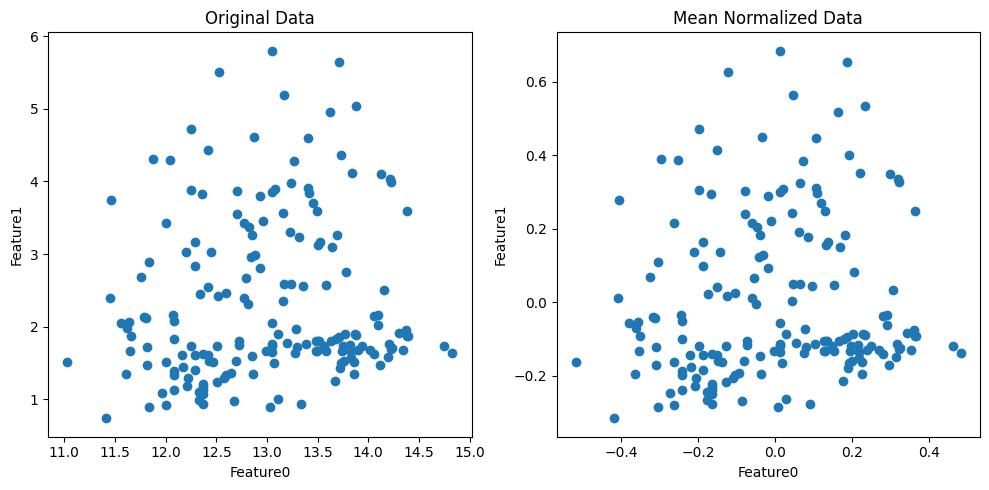

In [ ]:
# Plot original train data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(df['feature0'], df['feature1'])
plt.title('Original Data')
plt.xlabel('Feature0')
plt.ylabel('Feature1')

# Plot normalized train data
plt.subplot(1, 2, 2)
plt.scatter(mean_normalized_data['feature0'], mean_normalized_data['feature1'])
plt.title('Mean Normalized Data')
plt.xlabel('Feature0')
plt.ylabel('Feature1')

plt.tight_layout()
plt.show()

In [ ]:
data=mean_normalized_data.values
data

array([[ 0.32352158, -0.12378425,  0.03394821, ...,  0.06711428,
         0.47923612,  0.22689497],
       [ 0.05246895, -0.10995026, -0.12113201, ...,  0.07524436,
         0.28875993,  0.21619596],
       [ 0.04194264,  0.00467425,  0.16229045, ...,  0.0589842 ,
         0.20451084,  0.31248698],
       ...,
       [ 0.07089001,  0.38412089, -0.05696088, ..., -0.29873938,
        -0.38523274,  0.06284361],
       [ 0.04457422,  0.05012879,  0.00186264, ..., -0.2906093 ,
        -0.36325472,  0.06640994],
       [ 0.2972058 ,  0.34854776,  0.19972361, ..., -0.28247922,
        -0.37058073, -0.13330475]])

In [ ]:
def centroids_initialize(mean_normalized_data, k):
    centroids=mean_normalized_data.sample(k).values
    return centroids

In [ ]:
def distance(x1,x2):
    distances=np.sqrt(np.sum((x1-x2)**2))
    return distances

In [ ]:
def closest_centroid(data,centroids,k):
    centroids=centroids_initialize(mean_normalized_data, k)
    distances=np.empty(data.shape[0])
    for i in range(data.shape[0]):
        distances[i]=distance(data[i],centroids)
    return np.argmin(distances)

In [ ]:
def label(data,centroids,k):
    centroids=centroids_initialize(mean_normalized_data, k)
    labels=np.empty(data.shape[0])
    for i in range(data.shape[0]):
        labels[i]=closest_centroid(data,centroids,k)
    return labels

In [ ]:
def cal_new_centroids(data,labels,k):
    new_centroids=np.empty((k,data.shape[1]))
    for i in range(k):
        new_centroids[i]=np.mean(data[labels==i])
    return new_centroids

In [ ]:
def K_means(data,k,iterations):
    centroids=centroids_initialize(mean_normalized_data, k)
    for i in range(iterations):
        labels=label(data,centroids,k)
        new_centroids=cal_new_centroids(data,labels,k)
        if np.array_equal(centroids,new_centroids):
            break
        centroids=new_centroids
    return labels,centroids

In [ ]:
labels,centroids=K_means(data,k=5,iterations=100)
labels

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


array([  4.,  81., 117.,   4., 107., 102., 168.,  88., 107.,  37., 107.,
        34.,   4.,  23.,  35., 107., 141.,   4.,  38.,  12.,  81., 139.,
        35.,  62., 107.,  37., 102.,  34.,  38., 117., 111.,  81., 102.,
        81.,  65.,  37.,  48.,  37.,  72., 161., 107., 106.,  81.,  32.,
        26.,  37.,  48.,  34.,  34.,  32., 134.,  37.,  37.,  37.,  48.,
        37., 129.,  38.,  81., 102., 117.,  43., 111.,  32., 102.,  65.,
        37., 101., 163.,  65.,  43.,  37.,  32.,  81.,  38.,  48.,  81.,
        37.,  81.,  37.,  43.,  81.,  81.,   4.,   4.,  32.,  48.,  81.,
       106.,  81., 106.,  72.,  35.,  37.,  37.,  81.,  37.,  37.,  37.,
       141.,  34.,  43., 163.,   4.,  37., 163., 139.,   4.,  65., 103.,
       107.,  81.,  44.,  81.,  35.,  43.,  81.,  43.,  37.,  43., 129.,
        37.,  88., 119., 111., 131.,  35., 161.,  43.,   4., 107.,  35.,
       148.,  34.,  81.,  48.,  65.,  81., 141.,  81., 170.,  34.,  37.,
       101.,  65.,  44.,  37.,  35.,  29., 102.,  4

In [ ]:
def wcss(labels,centroids,k):
    wcss_value=0
    for i in range(centroids.shape[0]):
        if np.sum(labels==i)>0:
            wcss_value=np.sum(np.sum((data[labels==i]-centroids)**2))
    return wcss_value
k=range(1,11)
wcss_value=np.empty(10)
for i,k in enumerate(k):
  #  labels,centroids=K_means(data,k,iterations=100)
   # wcss_value[i]=wcss(labels,centroids,k)
#print(wcss_value)